# Mall Customer Segmentation Data

## About this Dataset

### Context

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
#rest of the libraries will be imported were ever necessary
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\Mall_Customers.csv')
df.head()#first 5 observations

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()#last 5 observations

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape#total 1044 rows and 33 features

(200, 5)

In [6]:
df.info()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()#stastical summary

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()#checking for null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Box plot for the column :  CustomerID


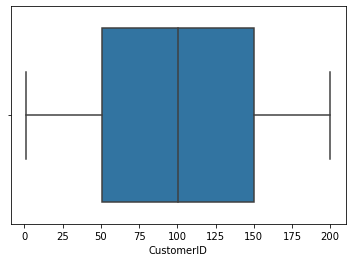

Box plot for the column :  Age


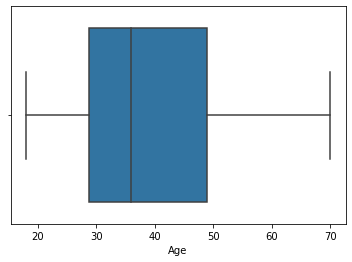

Box plot for the column :  Annual Income (k$)


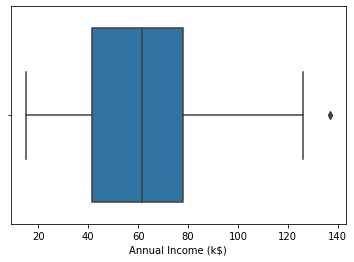

Box plot for the column :  Spending Score (1-100)


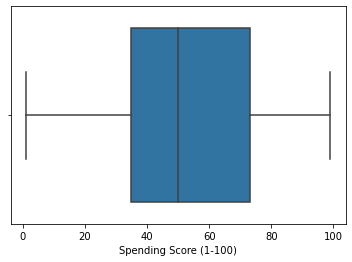

In [9]:
#checking for outliers
for i in df.select_dtypes(include=np.number).columns:
    print('Box plot for the column : ',i)
    sns.boxplot(df[i])
    plt.show()

In [10]:
#There are no significant outliers.

In [11]:
df1=df.drop('CustomerID',axis=1)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
#Encoding

In [13]:
df1['Gender']=df1['Gender'].replace('Male',1)
df1['Gender']=df1['Gender'].replace('Female',0)

In [14]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [15]:
#Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_1=sc.fit_transform(df1)
df2=pd.DataFrame(df_1,columns=df1.columns)
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [17]:
#Clustering Methods

In [18]:
#1.DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

In [19]:
#DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular learning method utilized in model building and machine learning algorithms. 
#This is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density.

In [20]:
#DBSCAN is a density-based clustering method. It can create non-linear clusters. 
#This method considers a high-density region as a cluster and the low-density points are considered as outliers. 
#We do not need to provide the required number of clusters to the algorithm.

In [21]:
#Estimating Approxiamte epsilon

In [22]:
from sklearn.neighbors import NearestNeighbors

In [23]:
Nearest_Neighbors=NearestNeighbors(n_neighbors=10)
Nearest_Neighbors=Nearest_Neighbors.fit(df2)
distances,indices=Nearest_Neighbors.kneighbors(df2)

In [24]:
distances.shape,indices.shape

((200, 10), (200, 10))

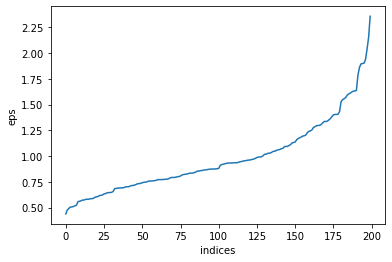

In [25]:
distances=distances[:,9]
distances=np.sort(distances,axis=0)
plt.plot(distances)
plt.xlabel('indices')
plt.ylabel('eps')
plt.show()

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
# instantiate DBSCAN with epsilon and minimum points 
# pass the epsilon radius for neighbourhood
# pass the number of minimum points
model = DBSCAN(eps = 1.5, min_samples = 10)

# fit the model on the scaled data
model.fit(df2)

DBSCAN(eps=1.5, min_samples=10)

In [28]:
# display the unique clusters formed by DBSCAN
set(model.labels_)

{-1, 0, 1}

In [29]:
#Interpretation: 

#From the above output we can see that the DBSCAN algorithm has created 3 clusters. 
#The data points labeled as -1 are the outliers identified by DBSCAN.

In [30]:
df_dbscan=df.copy()#making the copy for DBSCAN

In [31]:
# add a column containing cluster number to the original data
df_dbscan['Cluster_DBSCAN'] = model.labels_

# print head() of the newly formed dataframe
df_dbscan.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_DBSCAN
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [32]:
# check the size of each cluster
df_dbscan['Cluster_DBSCAN'].value_counts()

 0    112
 1     87
-1      1
Name: Cluster_DBSCAN, dtype: int64

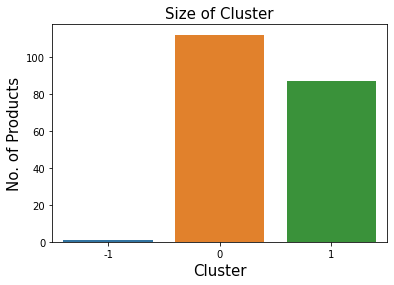

In [33]:
# plot the countplot for the cluster size
sns.countplot(data = df_dbscan, x = 'Cluster_DBSCAN')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

In [34]:
#Interpretation: 

#From the above output we can see that a cluster with 112 is the largest cluster and other clusters is 87.
#Outlier has only 1 datapoint

In [35]:
df_dbscan.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_DBSCAN'],
      dtype='object')

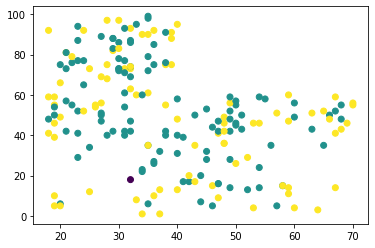

In [36]:
plt.scatter('Age','Spending Score (1-100)',c='Cluster_DBSCAN',data=df_dbscan)
plt.show()

In [37]:
#2. K-means clustering

In [38]:
#K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data 
#(i.e., data without defined categories or groups).

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [40]:
#Elbow Method

In [41]:
wcss=[]
for i in range(2,11):
    Kmeans=KMeans(n_clusters=i,random_state=2)
    Kmeans.fit(df2)
    wcss.append(Kmeans.inertia_)

In [42]:
print(wcss)

[588.8026767824932, 484.2305339921711, 386.7147857740689, 325.10998348953416, 274.75323206968363, 236.25761095237866, 199.78478208926091, 174.13484243484044, 152.1180132761412]


In [43]:
#Optimal Value of K Using Elbow Method

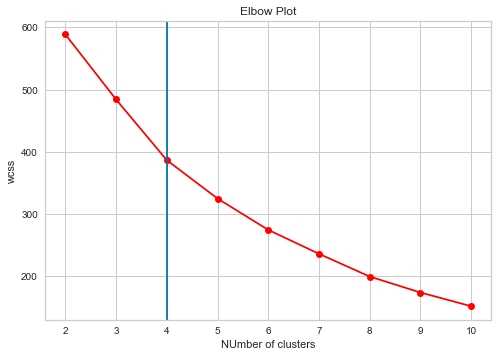

In [44]:
plt.plot(range(2,11),wcss,marker='o',color='red')
plt.title('Elbow Plot')
plt.ylabel('wcss')
plt.xlabel('NUmber of clusters')
plt.axvline(x=4)
plt.show()

In [45]:
#We can see that the for K = 4, there is an elbow in the plot. 
#Before this elbow point, the WCSS is decreasing rapidly and after K = 4, the WCSS is decreasing slowly.

In [46]:
#Silhouette Method

In [47]:
for i in range(2,5):
    Kmeans=KMeans(n_clusters=i,random_state=2)
    Kmeans.fit(df2)
    predictions=Kmeans.labels_
    score=silhouette_score(df2,predictions,random_state=4)
    print('For cluster k=',i,'the Silhouette Score is',score)

For cluster k= 2 the Silhouette Score is 0.2518152915788437
For cluster k= 3 the Silhouette Score is 0.26135746780821956
For cluster k= 4 the Silhouette Score is 0.3016237438985174


In [48]:
# The above Silhouette Score for different values of K are calculated and K = 4 has the highest score as compared to others, 
#hence 4 is the optimal value depending upon the Silhouette Scorescore

In [49]:
#Optimal Value of K Using Silhouette Score

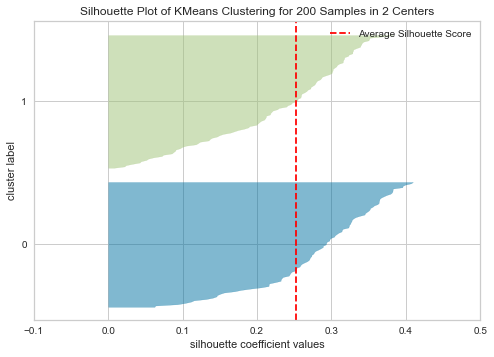

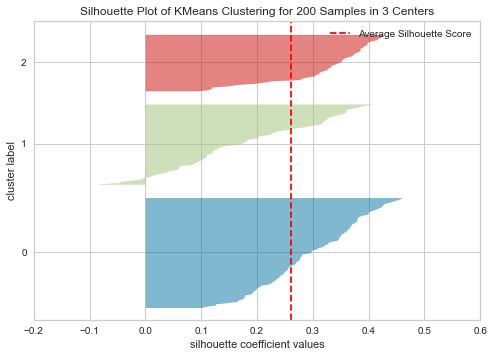

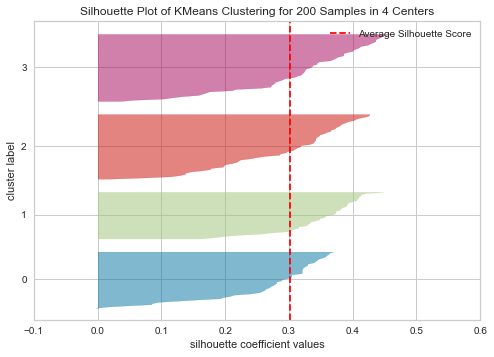

In [50]:
for i in range(2,5):
    Kmeans=KMeans(n_clusters=i,random_state=2)
    viz=SilhouetteVisualizer(estimator=Kmeans,colors='yellowbrick')
    viz.fit(df2)
    viz.show()

In [51]:
#The above plot shows the silhouette plot for each value of K =2,3,4
#from the above output, we can see that the silhouette score is maximum for k = 4 and 
#from the plot, we can see that there are are outliers for one clusters but less than 2 and 4 clusters
#and all the clusters have silhouette coefficients greater than the average silhouette score.
#Thus we choose K = 4 as the optimal value of k.

In [52]:
#Build the clusters

In [53]:
df_kmeans=df.copy()

In [54]:
df_kmeans['Cluster_Kmeans']=Kmeans.labels_
df_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Kmeans
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [55]:
df_kmeans['Cluster_Kmeans'].value_counts()

3    57
2    55
0    48
1    40
Name: Cluster_Kmeans, dtype: int64

In [56]:
#Cluster 1

In [57]:
# statistical summary of the numerical variables
df_kmeans[df_kmeans['Cluster_Kmeans']==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster_Kmeans
count,48.000000,48.000000,48.000000,48.000000,48.0
mean,104.958333,49.437500,62.416667,29.208333,0.0
std,54.647792,14.028703,24.696311,19.266284,0.0
min,9.000000,19.000000,19.000000,1.000000,0.0
25%,60.750000,40.000000,46.000000,11.750000,0.0
50%,106.500000,48.500000,62.500000,32.000000,0.0
75%,152.500000,59.250000,78.000000,46.250000,0.0
max,199.000000,70.000000,137.000000,60.000000,0.0


In [58]:
# summary of the categorical variable
df_kmeans[df_kmeans['Cluster_Kmeans']==0].describe(include='object')

,Gender
count,48
unique,1
top,Male
freq,48


In [59]:
#Cluster 2

In [60]:
# statistical summary of the numerical variables
df_kmeans[df_kmeans['Cluster_Kmeans']==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster_Kmeans
count,40.000000,40.000000,40.000000,40.000000,40.0
mean,103.375000,28.250000,62.000000,71.675000,1.0
std,61.408129,6.975231,29.117798,16.727664,0.0
min,1.000000,18.000000,15.000000,39.000000,1.0
25%,49.500000,21.750000,41.000000,58.250000,1.0
50%,109.000000,28.000000,63.000000,73.000000,1.0
75%,150.500000,33.250000,78.000000,88.500000,1.0
max,200.000000,40.000000,137.000000,97.000000,1.0


In [61]:
# summary of the categorical variable
df_kmeans[df_kmeans['Cluster_Kmeans']==1].describe(include='object')

,Gender
count,40
unique,1
top,Male
freq,40


In [62]:
#Cluster 3

In [63]:
# statistical summary of the numerical variables
df_kmeans[df_kmeans['Cluster_Kmeans']==2].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster_Kmeans
count,55.000000,55.000000,55.000000,55.000000,55.0
mean,94.818182,48.109091,58.818182,34.781818,2.0
std,56.515842,9.836954,25.771856,16.465104,0.0
min,3.000000,20.000000,16.000000,5.000000,2.0
25%,49.000000,41.500000,41.000000,21.000000,2.0
50%,87.000000,49.000000,57.000000,39.000000,2.0
75%,139.000000,54.000000,74.000000,48.500000,2.0
max,197.000000,68.000000,126.000000,59.000000,2.0


In [64]:
# summary of the categorical variable
df_kmeans[df_kmeans['Cluster_Kmeans']==2].describe(include='object')

,Gender
count,55
unique,1
top,Female
freq,55


In [65]:
#Cluster 4

In [66]:
# statistical summary of the numerical variables
df_kmeans[df_kmeans['Cluster_Kmeans']==3].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster_Kmeans
count,57.000000,57.000000,57.000000,57.000000,57.0
mean,100.210526,28.438596,59.666667,67.684211,3.0
std,60.308652,5.493560,26.463812,18.712255,0.0
min,4.000000,18.000000,16.000000,29.000000,3.0
25%,46.000000,23.000000,39.000000,51.000000,3.0
50%,106.000000,30.000000,62.000000,73.000000,3.0
75%,154.000000,32.000000,78.000000,83.000000,3.0
max,196.000000,40.000000,120.000000,99.000000,3.0


In [67]:
# summary of the categorical variable
df_kmeans[df_kmeans['Cluster_Kmeans']==3].describe(include='object')

,Gender
count,57
unique,1
top,Female
freq,57


In [68]:
#3. Agglomerative clustering

In [69]:
#It is the hierarchy based clustering method. 

#Agglomerative and Divisive clustering are the two types of hierarchical clustering.

In [70]:
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet,cut_tree
from sklearn.metrics.pairwise import euclidean_distances

In [71]:
method=['average',"single","ward","complete","centroid"]
for i in method:
    mergings=linkage(df2,method=i,metric='euclidean')
    ed=euclidean_distances(df2)
    distance_array=ed[np.triu_indices(df2.shape[0],k=1)]
    coef,coephenet_dist=cophenet(mergings,distance_array)
    print("Coephenet Coefficient for method",i,"is:",coef)

Coephenet Coefficient for method average is: 0.6750058673540061
Coephenet Coefficient for method single is: 0.5276569093479269
Coephenet Coefficient for method ward is: 0.5956238167278255
Coephenet Coefficient for method complete is: 0.5699859331710501
Coephenet Coefficient for method centroid is: 0.5987074359898626


In [72]:
#As Coephenet Coefficient is more for average with respect to other

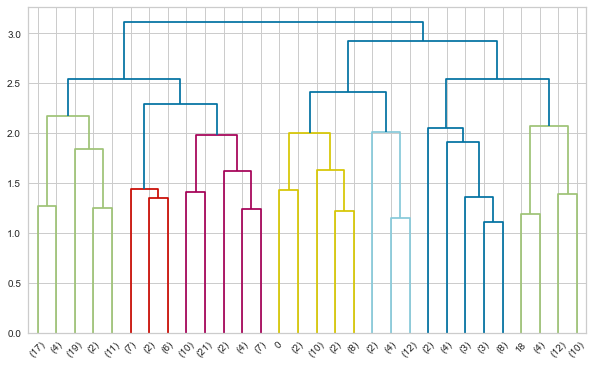

In [73]:
# Consider "average
plt.figure(figsize=(10,6))
mergings=linkage(df2,method='average', metric='euclidean')
dendrogram(mergings,truncate_mode="lastp")
plt.show()

In [74]:
#From above Dendrogram the Optimal value is considered as 5 for our Analysis.
#Hence we cut the Tree above 2.5 to obtain 5 clusters

In [75]:
Cluster_cut=pd.Series(cut_tree(mergings,n_clusters=5).reshape(-1,))

In [76]:
Cluster_cut.value_counts()

1    59
2    53
0    41
3    27
4    20
dtype: int64

In [77]:
df_Aggl=df.copy()

In [78]:
df_Aggl['Cluster_Aggl']=Cluster_cut

In [79]:
df_Aggl.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Aggl
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


In [80]:
df_Aggl.groupby(['Cluster_Aggl']).agg('mean')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Aggl,,,,
0,99.731707,28.390244,60.243902,69.756098
1,93.677966,47.169492,58.288136,35.813559
2,101.886792,28.000000,60.320755,69.018868
3,70.148148,57.370370,48.259259,41.777778
4,159.500000,39.500000,85.150000,14.050000


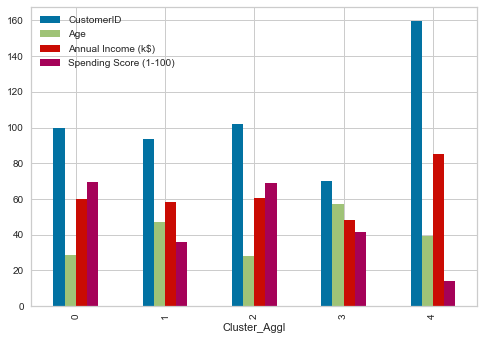

In [81]:
df_Aggl.groupby(['Cluster_Aggl']).agg('mean').plot.bar()
plt.show()

In [82]:
#-----------------------------------------------END------------------------------------------------------------------#